! pip install -U yellowbrick

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [16, 16]
#plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## Introduction to Data Science  

### Introduction to [Yellow Brick](https://www.scikit-yb.org/en/latest/) Visualiser  
based on [this](https://medium.com/data-science-community-srm/machine-learning-visualizations-with-yellowbrick-3c533955b1b3) article

Some of the popular visualizers are:

+ Feature Analysis Visualizers
+ Target Visualizers
+ Regression Visualizers
+ Classification Visualizers
+ Clustering Visualizers
+ Model Selection Visualizers
+ Text Visualizers

1. Feature Analysis Visualizers

Feature analysis visualizers are used to detect features or targets that might impact downstream fitting. Here, we’ll use the Rank1D and Rank2D features to evaluate single features and pairs of features using a variety of metrics that score the features on the scale [-1, 1] or [0, 1].

A one-dimensional ranking of features [Rank1D] utilizes a ranking algorithm that takes into account only a single feature at a time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


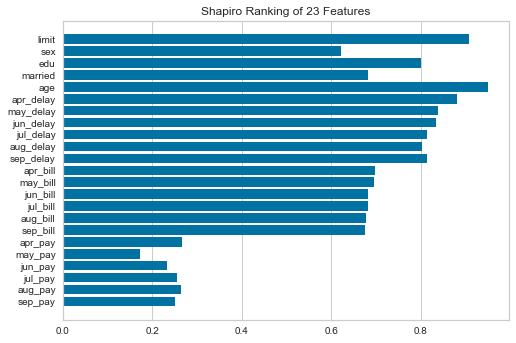

In [2]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D

# Load the credit dataset
X, y = load_credit()

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure# Note: I have used the yellowbrick's pre-loaded datasets to implement all the visualizers.

A two-dimensional ranking of features [Rank 2D] utilizes a ranking algorithm that takes into account pairs of features at a time

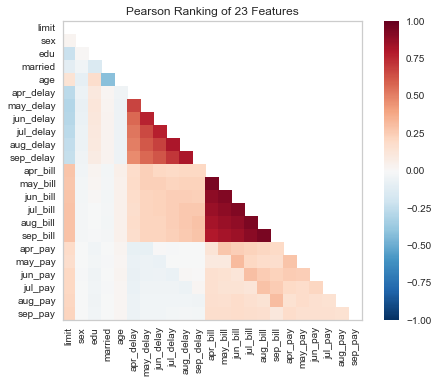

In [3]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Load the credit dataset
X, y = load_credit()

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

2. Target Visualizers

These visualizers specialize in visually describing the dependent variable for supervised modeling, often referred to as y or the target. Here, we’ll look at the Class balance visualizer. Imbalance of classes in the training data is one of the biggest challenges for Classification models and before we start dealing with it, it is important to understand what the class balance is in the training data.

The ClassBalance visualizer supports this by creating a bar chart of the support for each class, which is the frequency of the classes’ representation in the dataset.

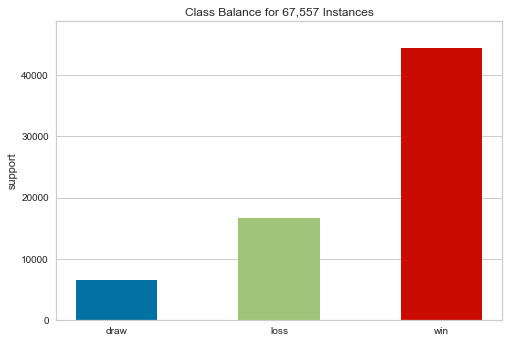

In [4]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["draw", "loss", "win"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

3. Regression Visualizer

Regression models attempt to predict a target in a continuous space. Regressor score visualizers display the instances in model space to help us better understand how the model is making predictions. In this blog, we’ll look at the Prediction Error Plot which plots the expected vs. actual values in model space.

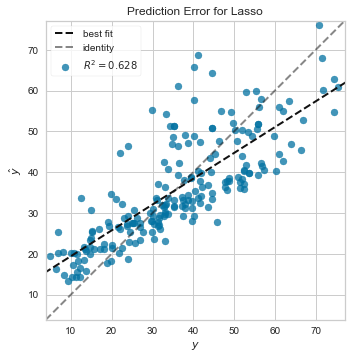

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)         # Fit the training data 
visualizer.score(X_test, y_test)         # Evaluate the model 
visualizer.show()                        # Render the figure

4. Classification Visualizer

Classification models attempt to predict a target in a discrete space, that is assigned an instance of dependent variables one or more categories. The Classification score visualizers display the differences between classes as well as a number of classifier-specific visual evaluations.

We’ll look at the Confusion Matrix Visualizer with the quick method confusion_matrix, it will build the ConfusionMatrix object with the associated arguments, fit it, and then we can render it.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


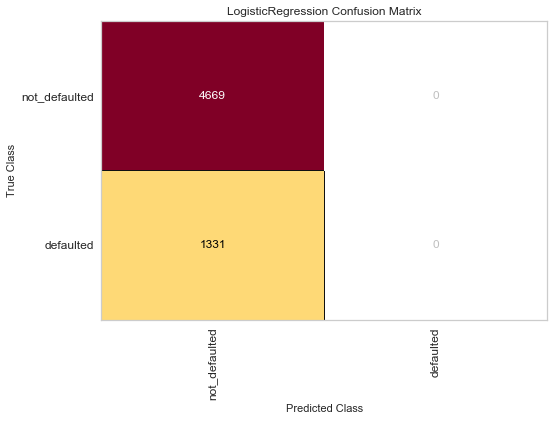

<Figure size 576x396 with 0 Axes>

In [6]:
from yellowbrick.datasets import load_credit
from yellowbrick.classifier import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout()

5. Clustering Visualizer

Clustering models are unsupervised methods that attempt to detect patterns in unlabeled data. Yellowbrick provides the yellowbrick.cluster module to visualize and evaluate clustering behavior.

The KElbowVisualizer helps us select the optimal number of clusters by fitting the model with a range of values for ‘k’. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In this visualizer, “elbow” will be annotated with a dashed line.

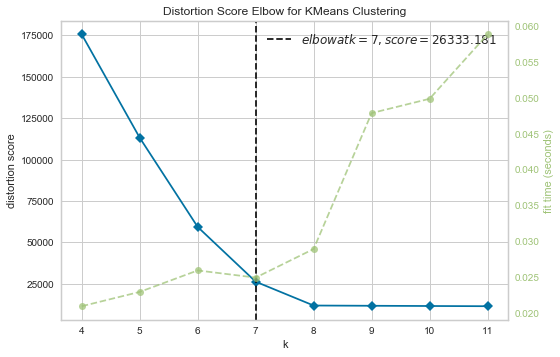

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

6. Model Selection Visualizer:

The yellowbrick.model_selection package provides us with visualizers for inspecting the performance of cross-validation and hyperparameter tuning. Many visualizers wrap functionality found in sklearn.model_selection and others build upon it for performing multi-model comparisons.

Model validation is used to determine how effective an estimator is on data that it has been trained on as well as how generalizable it is to new input. To measure a model’s performance we first split the dataset into training and test splits, fitting the model on the training data and scoring it on the reserved test data. the hyperparameters of the model must be selected which best allows the model to operate in the specified feature space to maximize its score.

In my example, we’ll explore using the ValidationCurve visualizer with a regression dataset.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


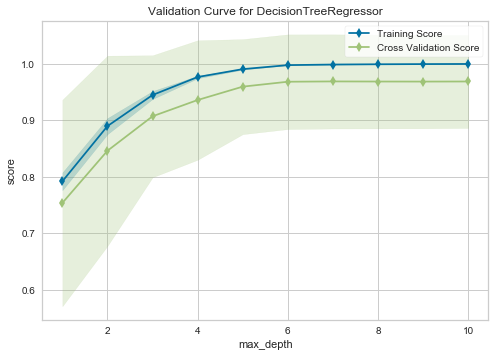

In [8]:
import numpy as np

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve

from sklearn.tree import DecisionTreeRegressor

# Load a regression dataset
X, y = load_energy()

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

7. Text Modelling Visualizer:

The last visualizer that we’ll check out in this blog is from the yellowbrick.text module for text-specific visualizers. The TextVisualizer class specifically deals with datasets that are corpora and not simple numeric arrays or DataFrames, providing utilities for analyzing word dispersion and distribution, showing document similarity, or simply wrapping some of the other standard visualizers with text-specific display properties. Here, we’ll check out the FrequencyVisualizer for Token Frequency Distribution.

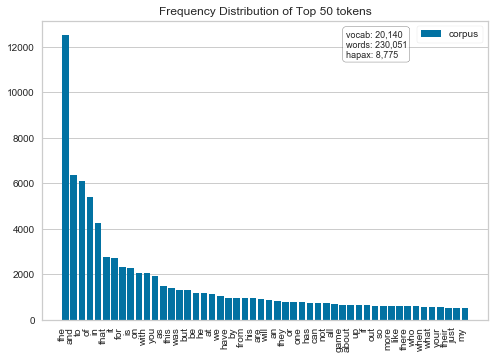

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = load_hobbies()

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()